In [15]:
import pandas as pd
import numpy as np

In [58]:
df = pd.read_csv("surveyA.csv")
df.head(5)


,age,race,gender,employment,education,married,person_living_in_house,salary,house_type,house_value,...,transport_use,transport_spending,public_transport_spending,house_utility,food_spending,kids_spending,personal_loan,education_loan,other_loan,investment
0,30,Kree,M,Employed,High School,Yes,3,1K to 2K,Rental house - flat,Below 100K,...,Own transport,250,0.0,120,300.0,160,0.0,0.0,200.0,0.0
1,43,Sapiens,M,Self-employed,Bachelor's Degree,Yes,3,5K to 6K,Own house - condominiums,300K to 400K,...,Own transport,700,0.0,350,1000.0,500,300.0,0.0,0.0,0.0
2,28,Skrull,F,Employed,Bachelor's Degree,Yes,5,2K to 3K,Parent's House,NaN,...,Own transport,600,0.0,300,600.0,100,0.0,0.0,0.0,0.0
3,57,Kree,F,Self-employed,High School,Yes,4,1K to 2K,Own house - kampung / wooden house,Below 100K,...,Own transport,100,0.0,200,800.0,450,0.0,0.0,0.0,0.0
4,51,Skrull,F,Unemployed,High School,Yes,5,3K to 4K,Own house - flat,Below 100K,...,NaN,0,0.0,180,0.0,0,0.0,0.0,0.0,0.0


In [56]:
df["transport_use"].unique()

array(['Own transport', nan, 'Public transport',
       'Own transport & Public transport'], dtype=object)

In [69]:
df.columns[1:]

Index(['race', 'gender', 'employment', 'education', 'married',
       'person_living_in_house', 'salary', 'house_type', 'house_value',
       'vehicle', 'house_rental_fee', 'house_loan_pmt', 'transport_use',
       'transport_spending', 'public_transport_spending', 'house_utility',
       'food_spending', 'kids_spending', 'personal_loan', 'education_loan',
       'other_loan', 'investment'],
      dtype='object')

In [18]:
df.isnull().sum()

age                            0
race                           0
gender                         0
employment                     2
education                      3
married                        3
person_living_in_house         5
salary                        58
house_type                     9
house_value                  957
vehicle                       29
house_rental_fee             153
house_loan_pmt                87
transport_use                525
transport_spending            32
public_transport_spending    231
house_utility                 12
food_spending                 11
kids_spending                 27
personal_loan                132
education_loan               133
other_loan                   114
investment                   152
dtype: int64

In [19]:
df.duplicated().sum()

6

In [20]:
df = df.drop_duplicates()

In [21]:
# target value
df["salary"].unique()

array(['1K to 2K', '5K to 6K', '2K to 3K', '3K to 4K', '10K or more',
       '4K to 5K', 'Less than 1K', '8K to 9K', nan, '7K to 8K',
       '9K to 10K'], dtype=object)

### Drop Certain Collumn 
which has too much null value
creating new data -- after deducted some column which has too much null value

In [22]:
df = df[['age', 'race', 'gender', 'employment', 'education', 'married',
       'person_living_in_house', 'house_type','food_spending', 'salary']]

df.dropna(subset=['employment', 'education', 'married', 'person_living_in_house','house_type', 'food_spending'], inplace=True)

In [23]:
# delete row with NA in Salary column
df.dropna(subset=["salary"], inplace=True)

In [24]:
df.isnull().sum()

age                       0
race                      0
gender                    0
employment                0
education                 0
married                   0
person_living_in_house    0
house_type                0
food_spending             0
salary                    0
dtype: int64

In [25]:
for i in df.columns:
    print(i, len(df[i].unique()), "\n")

age 63 

race 4 

gender 2 

employment 6 

education 4 

married 3 

person_living_in_house 10 

house_type 13 

food_spending 38 

salary 10 



In [26]:
df.head()

,age,race,gender,employment,education,married,person_living_in_house,house_type,food_spending,salary
0,30,Kree,M,Employed,High School,Yes,3,Rental house - flat,300.0,1K to 2K
1,43,Sapiens,M,Self-employed,Bachelor's Degree,Yes,3,Own house - condominiums,1000.0,5K to 6K
2,28,Skrull,F,Employed,Bachelor's Degree,Yes,5,Parent's House,600.0,2K to 3K
3,57,Kree,F,Self-employed,High School,Yes,4,Own house - kampung / wooden house,800.0,1K to 2K
4,51,Skrull,F,Unemployed,High School,Yes,5,Own house - flat,0.0,3K to 4K


In [27]:
df.shape

(2158, 10)

# Preprocessing
Replace string value in the column into numeric value
Column that need to change
1. race - LabelEnc --> HotEncode (4)
 
2. gender - Binarizer

3. employment - LabelEnc --> HotEncode(6)
3. education  - LabelEnc --> HotEncode (4)
4. married - LabelEnc --> HotEncode (3)
5. house_type - LabelEnc --> HotEncode (10) - too much 

6. Salary - using .replace() function  (10) - too much

In [52]:
col = ['race', 'gender', 'employment', 'education', 'married',
       'person_living_in_house', 'house_type']

for i in col:
       df[i] = le.fit_transform(df[i])

In [53]:
df

,age,race,gender,employment,education,married,person_living_in_house,house_type,food_spending,salary
0,30,0,1,0,3,2,3,9,300.0,0
1,43,2,1,4,0,2,3,1,1000.0,1
2,28,3,0,0,0,2,5,6,600.0,0
3,57,0,0,4,3,2,4,4,800.0,0
4,51,3,0,5,3,2,5,3,0.0,0
...,...,...,...,...,...,...,...,...,...,...
2221,63,2,1,4,3,2,5,4,200.0,0
2222,59,1,1,4,3,2,4,4,150.0,0
2223,64,2,1,0,3,2,5,3,1000.0,0
2224,34,0,1,0,2,1,4,6,2000.0,1


### Using LabelEncode to column Race, Education, Marriage

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["race"] = le.fit_transform(df["race"])
df["gender"] = le.fit_transform(df["gender"])
df["education"] = le.fit_transform(df["education"])
df["employment"] = le.fit_transform(df["employment"])
df["married"] = le.fit_transform(df["married"])
df["house_type"] = le.fit_transform(df["house_type"])
df.head()


,age,race,gender,employment,education,married,person_living_in_house,house_type,food_spending,salary
0,30,0,1,0,3,2,3,9,300.0,1K to 2K
1,43,2,1,4,0,2,3,1,1000.0,5K to 6K
2,28,3,0,0,0,2,5,6,600.0,2K to 3K
3,57,0,0,4,3,2,4,4,800.0,1K to 2K
4,51,3,0,5,3,2,5,3,0.0,3K to 4K


In [30]:
df["salary"] = df["salary"].replace(['Less than 1K','1K to 2K','2K to 3K','3K to 4K','4K to 5K'],'B')
df["salary"] = df["salary"].replace(['5K to 6K','7K to 8K','8K to 9K','9K to 10K','10K or more'],"M")

In [31]:
df["salary"] = le.fit_transform(df["salary"])


In [32]:
df.head()

,age,race,gender,employment,education,married,person_living_in_house,house_type,food_spending,salary
0,30,0,1,0,3,2,3,9,300.0,0
1,43,2,1,4,0,2,3,1,1000.0,1
2,28,3,0,0,0,2,5,6,600.0,0
3,57,0,0,4,3,2,4,4,800.0,0
4,51,3,0,5,3,2,5,3,0.0,0


In [33]:
# declare X and y value

X = df.drop('salary', axis=1)
y = df['salary']

In [34]:
df.columns

Index(['age', 'race', 'gender', 'employment', 'education', 'married',
       'person_living_in_house', 'house_type', 'food_spending', 'salary'],
      dtype='object')

## Applying `get_dummies` to OneHotEncode

In [35]:
# get X_encode using get_dummies
X_encode = pd.get_dummies(X, columns=['race', 'gender', 'employment', 'education', 'married',
       'person_living_in_house', 'house_type', 'food_spending'])

X_encode.head()


,age,race_0,race_1,race_2,race_3,gender_0,gender_1,employment_0,employment_1,employment_2,...,food_spending_1600.0,food_spending_1800.0,food_spending_2000.0,food_spending_2500.0,food_spending_2800.0,food_spending_3000.0,food_spending_3500.0,food_spending_4000.0,food_spending_5000.0,food_spending_6000.0
0,30,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,51,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Creating Model
### Suggestion Model: Support Vector Machine



In [36]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encode, y, test_size=0.2, random_state=42) 

In [37]:
y_train.shape

(1726,)

In [38]:
y_train[y_train == 1].count() # > 5k


241

In [39]:
y_train[y_train == 0].count() # < 5k

1485

### Scaled the X_train and X_test

In [40]:
from sklearn.preprocessing import scale
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

### Find optimize parameter use in SVC() using Cross Validation


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = [{'C':[0.5, 1, 10, 100],
                'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                'kernel':['rbf']
                },
            ]

optimal_param = GridSearchCV(
                SVC(), 
                param_grid,
                cv = 5,
                scoring = 'accuracy',
                )

optimal_param.fit(X_train_scaled, y_train)

print(optimal_param.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


Using above parameter in SVC() model,

In [42]:
svm = SVC(random_state=42, C=10, gamma=0.001)
svm.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.001, random_state=42)

# Perfom prediction using X_train_scaled



In [43]:
y_pred = svm.predict(X_test_scaled)
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [44]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("MSE:", mean_squared_error(y_test, y_pred), 
    "r2_score:", r2_score(y_test,y_pred))

MSE: 0.08333333333333333 r2_score: 0.33101045296167264


Plot confusing matrix

In [45]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.colors as colors

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


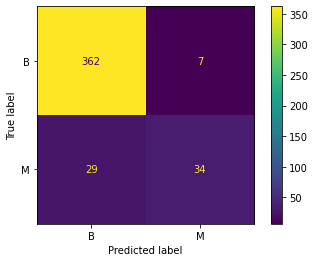

In [46]:
plot_confusion_matrix(svm,
                        X_test_scaled, 
                        y_test, 
                        values_format = 'd', 
                        display_labels = ['B', 'M']
)

## Apply PCA before visualization

In [47]:
from sklearn.decomposition import PCA 
import numpy as np

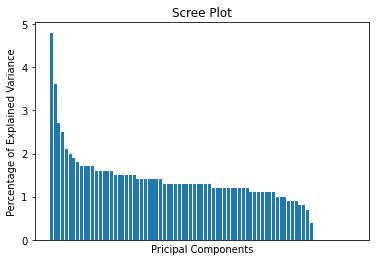

In [48]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var)

plt.tick_params(axis = 'x', 
                which = 'both', 
                bottom = False, 
                top = False,
                labelbottom = False)

plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Pricipal Components')

plt.title('Scree Plot')
plt.show()



Reoptimize the PCA as the reduction of multidimensional data into 2 PCA to be use in visualisation

In [49]:
train_pc1_coo = X_train_pca[:, 0] # x-axis coordinate after PCA
train_pc2_coo = X_train_pca[:, 1] # y-axis coordinate after PCA

# scale both axis above
pca_train_scale = scale(np.column_stack((train_pc1_coo, train_pc2_coo)))

# find best param for due to reduction using PCA

param_grid = [{'C':[1, 10, 100, 1000],
                'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                'kernel':['rbf']
                },
            ]
# cv : cross validation
optimal_param = GridSearchCV(
                SVC(), 
                param_grid,
                cv = 5,
                scoring = 'accuracy',
                )

optimal_param.fit(pca_train_scale, y_train)
print(optimal_param.best_params_)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


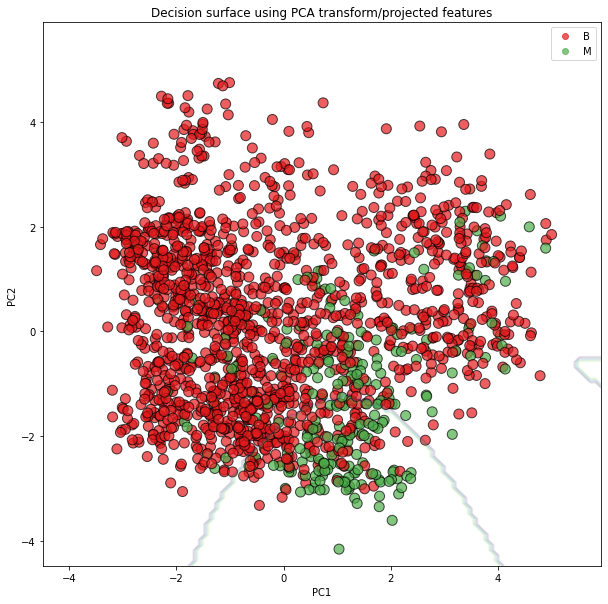

In [50]:
clf_svm = SVC(random_state=42, C=1000, gamma=0.1)
clf_svm.fit(pca_train_scale, y_train)

# trainform the test dataset wit PCA

X_test_pca = pca.transform(X_train_scaled)
test_pc1_coo = X_test_pca[:, 0]
test_pc2_coo = X_test_pca[:, 1]

# Create a matrix of point - to show decision regions.

x_min = test_pc1_coo.min() - 1
x_max = test_pc1_coo.max() + 1
y_min = test_pc1_coo.min() - 1
y_max = test_pc1_coo.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1), 
                    np.arange(start=y_min, stop=y_max, step=0.1))

# classfiy every point in matrix with SVM
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

# use reshape so the classification correspond to specific point in matrix
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))

ax.contour(xx, yy, Z, alpha=0.1)

# create custom color
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

scatter = ax.scatter(test_pc1_coo, test_pc2_coo, c=y_train,
                    cmap=cmap, 
                    s=100, 
                    edgecolors='k',
                    alpha=0.7)

legend = ax.legend(scatter.legend_elements()[0],
                    scatter.legend_elements()[1],
                    loc='upper right')


legend.get_texts()[0].set_text("B")
legend.get_texts()[1].set_text("M")

# add axis
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Decision surface using PCA transform/projected features')

plt.show()


- Note that this is the training data, not testing data. 
- The above graph also represent the first and second PCA, hence this is the approximation of the true classifier. 

11:34 pm 25/3/2022

- New problem:
> Need to predict the income group
